In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

## Data Set for Classification

In [2]:
X, y = datasets.make_blobs(n_samples=600,n_features=2, centers=2,cluster_std=2,random_state=420)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

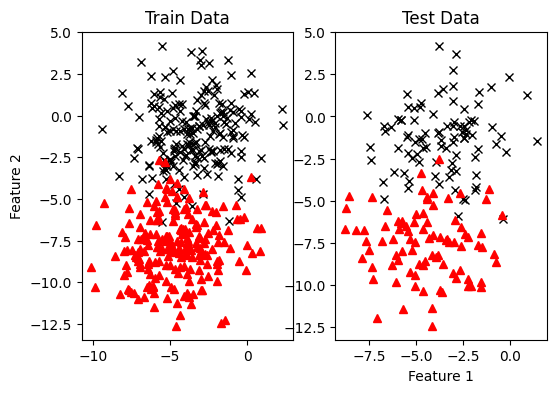

In [3]:
fig = plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'kx')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'r^')

plt.ylabel("Feature 2")
plt.title("Train Data")
plt.subplot(1, 2, 2)
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'kx')
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'r^')

plt.xlabel("Feature 1")

plt.title("Test Data")
plt.show()


# Perceptron Learning Algorithm
$y(x) = w^T x + w_0$, by using a step function where C1 if y(x) ⩾ 0 else C2.

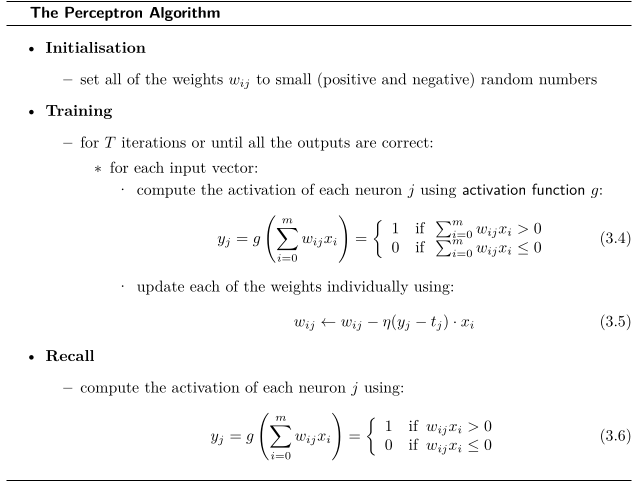

In [4]:
def g(x):
    return 1 if x>0 else 0

In [5]:
def PLA(X,y,eta,epochs):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    N,M = X.shape
    W = np.zeros((M,1))#np.random.randn(M).reshape(-1,1)
    miss_freq = np.zeros(epochs)
    
    T = range(epochs) 
    for i in T:
        miss = 0
        for j in range(N):
            y_hat = g(W.T @ X[j])
            err = y_hat - y[j]
            if err != 0:
                W -= eta* err * X[j].reshape(-1,1)
                miss+=1
        miss_freq[i] = miss 
        if miss == 0: break
    fig = plt.figure(figsize=(3,3))
    plt.plot(T, miss_freq)
    plt.xlabel('epochs(T)')
    plt.ylabel('Miss Classification')
    plt.show()
    
    return W

In [6]:
def predict_PLA(X,W):
    return np.array([g(W[0,:] + W[1:,:].T @ x) for x in X])

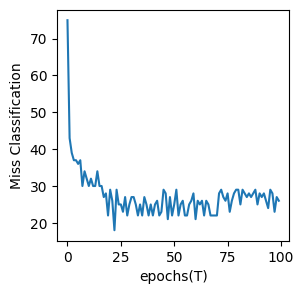

array([[-0.13      ],
       [-0.00432778],
       [-0.02841328]])

In [7]:
W = PLA(X_train,y_train,0.001,100)
W

In [8]:
print("Missclasification in Training Set:",np.sum(predict_PLA(X_test,W) != y_test))

Missclasification in Training Set: 14


In [9]:
def decision_boundary(X,y,w,name):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(6,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "kx")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.text(3.5, 0.5, f"Weights: {w}", bbox=dict(facecolor='white', alpha=0.5))
    plt.title(f"Decision Boundary by {name}")    
    plt.plot(x1, x2, 'y-')
    plt.show()

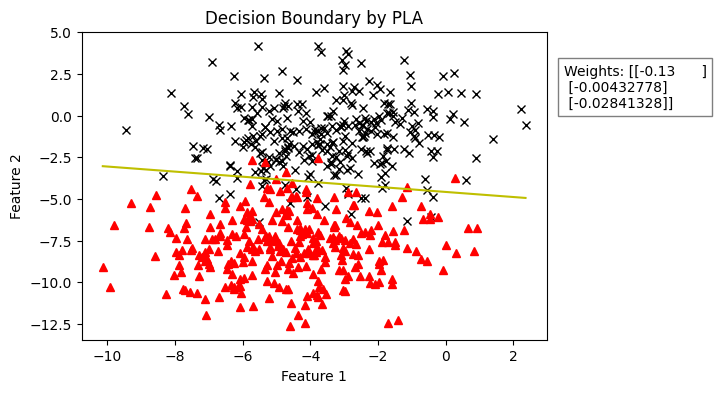

In [10]:
decision_boundary(X,y,W,"PLA")


# Logistic Regression
$y(\phi) = \sigma (w^T \phi)$ where $\sigma (.)$ sigmoid function.

Logloss(error) function,
$$
E(w) = -\ln p(\mathbf{t}| w) =- \sum_{n=1}^N \ \{t_n \ln y_n + (1-t_n) \ln (1 - y_n)\}
$$
the gradient of the error w.r.t W,
$$
\nabla E(w) = \sum_{n=1}^N(y_n - t_n)\phi_n
$$
to avoid over fitting the model we can add regularization term $λE_W(w) = \frac \lambda N w^Tw$ to the error gradient

now we can use the gradient descent algorithm to fit the model.
$
w^{(τ +1)} = w^{(τ )} − η∇En
$


In [11]:
def sigmoid(a):
    return 1/ (1 + np.exp(-a))

In [12]:
def prob(x,w):
    a = x @ w
    return sigmoid(a)

In [13]:
def logloss(t,y):
    eps = 1e-5
    y = np.clip(y,eps,1-eps) # to avoid fewer y values
    return -1*np.mean(t * np.log(y) + (1-t) * np.log(1-y))

In [14]:
def gradient(y,t,x,lam,N,w):
    return sum([((y[n] -t[n]) * x[n]) + (lam/N * (w.T @ w)) for n in range(N)]).reshape(-1,1)

In [15]:
def logistic_regression(X,y,lam,eta,epoch,batch,tol=1e-5):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    N,M = X.shape
    W = np.zeros((M,1))
    loss_epoch = []
    for i in range(epoch):
        prev_w = W.copy()
        for j in range(0,N,batch):
            a,b = j, j+batch
            if b> N: b = N
                
            x_j, t_j = X[a:b], y[a:b]
            y_hat = prob(x_j,W)
            nabla_W = gradient(y_hat,t_j,x_j,lam,b-a,W)
            W -= eta*nabla_W
            
        
        loss = logloss(y,prob(X,W))
        loss_epoch.append(loss)
        if np.linalg.norm(W - prev_w) < tol: break # (tol)convergence criterion
    
    fig = plt.figure(figsize=(3,3))
    plt.plot(range(len(loss_epoch)), loss_epoch)
    plt.xlabel('epochs(T)')
    plt.ylabel('Log Loss')
    plt.show()
    return W

In [16]:
def predict_LR(x,W,thresh=0.5):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    p = prob(x,W)
    for i in range(len(p)):
        p[i] = 1 if p[i] >= thresh else 0
#     pn = 1 - p
#     return np.array([p, pn]).T
    return p.reshape(1,-1)

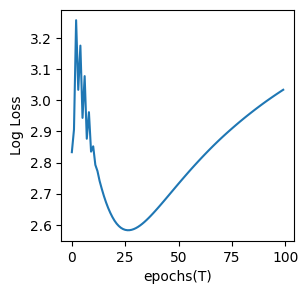

In [17]:
W = logistic_regression(X_train,y_train,0.00001,0.01,100,100)

In [18]:
y_pred = predict_LR(X_test,W)

In [19]:
print("Missclasification in Training Set:",np.sum(y_pred != y_test))

Missclasification in Training Set: 14


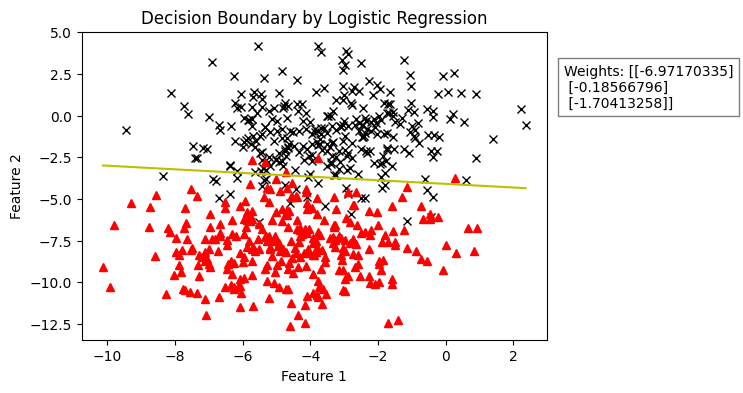

In [20]:
decision_boundary(X,y,W,"Logistic Regression")

# Naive Bayes Model
$$
 {\displaystyle {\text{posterior}}={\frac {{\text{prior}}\times {\text{likelihood}}}{\text{evidence}}}\,}
$$

$$
{\displaystyle P(C_{k}\mid \mathbf {x} )={\frac {P(C_{k})\ P(\mathbf {x} \mid C_{k})}{P(\mathbf {x} )}}\,
= \frac {P(C_k)P(x|C_k)} {\sum_i P(x|C_i)P(C_i)} = \frac {\exp(a_k)} {\sum_j \exp(a_j)}}
$$
where,
$$
a_k = \ln p(x|C_k )p(C_k ).
$$
so in model fitting, we compute the prior and mean and covariance of the data.

for prediction, for likelihood we assume the data is Normal, so we use mean and covariance to obtain the likelihood using gaussian PDF. 


In [21]:
from scipy.stats import multivariate_normal

In [22]:
class NaiveBayes:
    def fit(self, X, y):
        self.C = np.unique(y)
        self.k = len(self.C)
        self.prior = np.zeros(self.k)
        self.mean = []
        self.cov = []
        
        for i in range(self.k):
            X_class = X[y == self.C[i]]
            self.mean.append(np.mean(X_class, axis=0))
            self.cov.append(np.cov(X_class.T))
            self.prior[i] = X_class.shape[0] / X.shape[0]

    def predict(self, X):
        N = len(X)
        prediction = np.zeros(N)
        probs = []
        for i in range(N):
            posterior = np.zeros(self.k)
            for j in range(self.k):
                likelihood = multivariate_normal.pdf(X[i], mean=self.mean[j], cov=self.cov[j])
                posterior[j] = np.exp(np.log(likelihood*self.prior[j])) # a_k
            # Normalizing the posterior by evidence
            posterior/= sum(posterior)
            probs.append(posterior)
            prediction[i] = self.C[np.argmax(posterior)]
        return prediction,np.array(probs)

In [23]:
model_nb = NaiveBayes()
model_nb.fit(X_train,y_train)

In [24]:
y_pred_nb,prob = model_nb.predict(X_test)

In [25]:
print("Missclasification in Training Set:",np.sum(y_pred_nb != y_test))

Missclasification in Training Set: 9


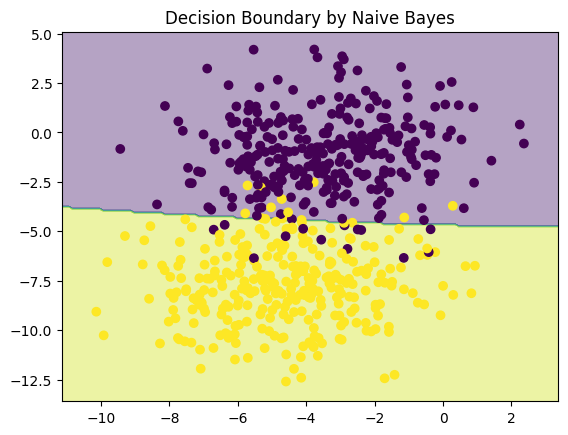

In [26]:
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

Z,_ = model_nb.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Decision Boundary by Naive Bayes")
plt.show()


In [27]:
df = pd.DataFrame(data = np.hstack((prob, y_pred_nb.reshape(-1,1),y_test.reshape(-1,1))),columns=['Prob_C1', 'Prob_C2', 'y_test', 'y_pred'] )
df

,Prob_C1,Prob_C2,y_test,y_pred
0,0.453316,0.546684,1.0,1.0
1,0.909358,0.090642,0.0,0.0
2,0.968838,0.031162,0.0,0.0
3,0.198514,0.801486,1.0,1.0
4,0.005357,0.994643,1.0,1.0
...,...,...,...,...
175,0.692716,0.307284,0.0,0.0
176,0.005974,0.994026,1.0,1.0
177,0.999519,0.000481,0.0,0.0
178,0.006842,0.993158,1.0,1.0


# Support Vector Machine

equation of hyper plane (decision boundary),
$$
w^T x + b = 0
$$

where $w$ is the normal vector to the hyperplane, $b$ is the intercept, and $x$ is the feature vector. The goal of SVM is to find the optimal values of $w$ and $b$ that minimize the classification error and maximize the margin.

$$
f(x) = sign(w^T x + b)
$$

To find optimal hyperplane we slove,

$$
\text{minimize } \frac{1}{2} ||w||^2 \text{ subject to } y_i(w^T x_i + b) \geq 1 \text{ for all } i
$$
we use kernel to transform the feature vectors to find non linear HP.

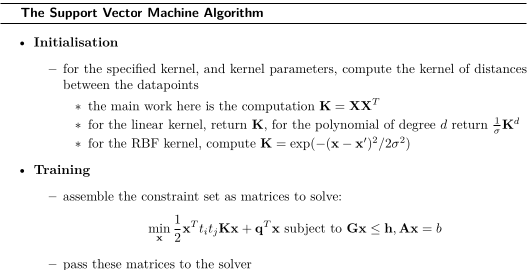
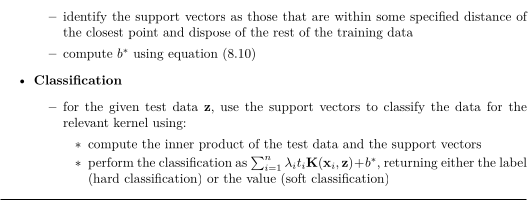

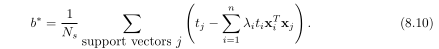

In [28]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
weights,intecept = clf.coef_, clf.intercept_
weights,intecept

(array([[-0.11532956, -1.06666326]]), array([-5.11718937]))

In [29]:
y_preds_svm = clf.predict(X_test)

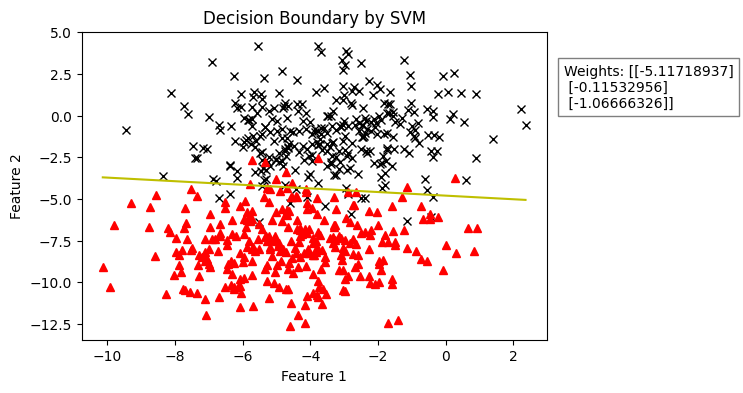

In [30]:
decision_boundary(X,y,np.vstack((intecept,weights.reshape(-1,1))),"SVM")

In [31]:
print("Missclasification in Training Set:",np.sum(y_preds_svm != y_test))

Missclasification in Training Set: 9
